In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings("ignore")

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.



There are 25 variables:

ID: ID of each client<br>
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit<br>
SEX: Gender (1=male, 2=female)<br>
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)<br>
MARRIAGE: Marital status (1=married, 2=single, 3=others)<br>
AGE: Age in years<br>
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)<br>
PAY_2: Repayment status in August, 2005 (scale same as above)<br>
PAY_3: Repayment status in July, 2005 (scale same as above)<br>
PAY_4: Repayment status in June, 2005 (scale same as above)<br>
PAY_5: Repayment status in May, 2005 (scale same as above)<br>
PAY_6: Repayment status in April, 2005 (scale same as above)<br>
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)<br>
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)<br>
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)<br>
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)<br>
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)<br>
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)<br>
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)<br>
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)<br>
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)<br>
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)<br>
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)<br>
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)<br>
default.payment.next.month: Default payment (1=yes, 0=no)

In [6]:
df = pd.read_csv(r"C:\Users\Syed Azeemuddin\Practise Pro\ineuron\UCI_Credit_Card.csv")

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

# EDA

<AxesSubplot:xlabel='AGE', ylabel='Density'>

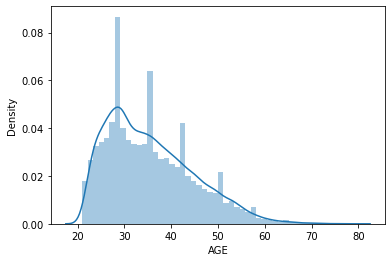

In [8]:
sns.distplot(df['AGE'])

<AxesSubplot:xlabel='SEX', ylabel='count'>

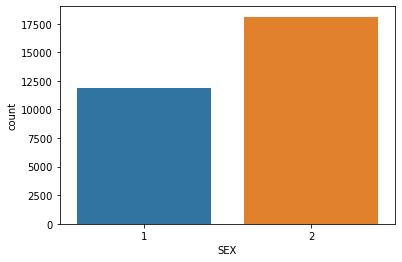

In [9]:
sns.countplot(df['SEX'])

<AxesSubplot:xlabel='default.payment.next.month', ylabel='count'>

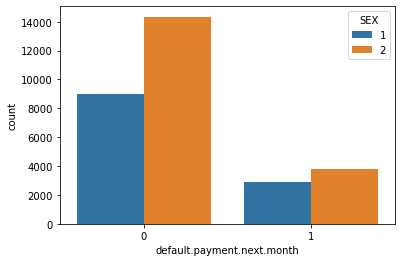

In [10]:
sns.countplot(x=df['default.payment.next.month'],hue=df['SEX'])

In [11]:
default_df = df[df['default.payment.next.month']==1]

<AxesSubplot:xlabel='default.payment.next.month', ylabel='count'>

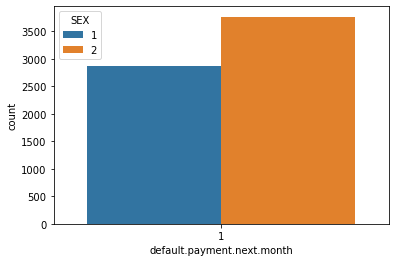

In [12]:
sns.countplot(x=default_df['default.payment.next.month'],hue=default_df['SEX'])

In [13]:
df['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

<AxesSubplot:xlabel='AGE', ylabel='Count'>

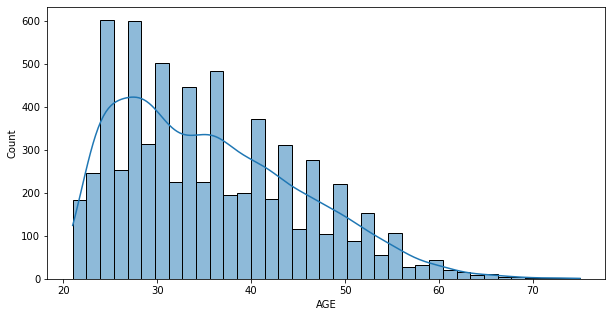

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(data=default_df, x='AGE',kde=True,)

In [15]:
matrix = df.corr()
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)]=True

<AxesSubplot:>

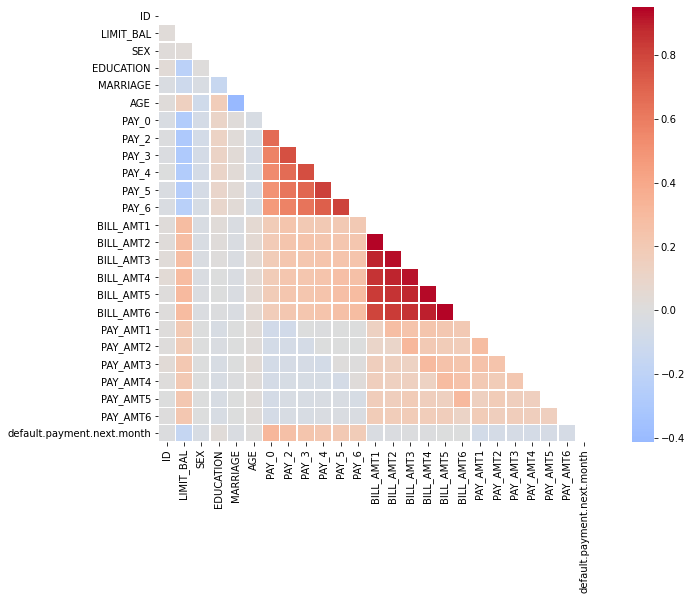

In [16]:
plt.figure(figsize=(14,8))
sns.heatmap(matrix,
           center=0,
           fmt='.3f',
           square=True,
           annot=False,
           linewidths=.3,
           mask=mask,
           cmap='coolwarm')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [18]:
df.rename(columns={'default.payment.next.month':'default'},inplace=True)

0    0.7788
1    0.2212
Name: default, dtype: float64

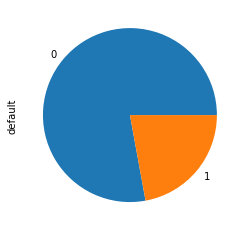

In [46]:
display(df.default.value_counts(normalize=True))
df.default.value_counts().plot(kind='pie')
plt.show()

Data Imbalance can be clearly seen

## Random Sampling 50% of the 0s (Under-Sampling)

In [20]:
zeros = df[df.default == 0].sample(frac=0.5,random_state=1).reset_index(drop=True)
ones = df[df.default == 1]

print(f"zeros: {zeros.shape}")
print(f"ones: {ones.shape}")

zeros: (11682, 25)
ones: (6636, 25)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix
from sklearn.model_selection import KFold

In [24]:
zero_train, zero_test = train_test_split(zeros,test_size = 0.2, random_state=22)
ones_train, ones_test = train_test_split(ones,test_size=0.2, random_state=22)

zero_train, zero_val = train_test_split(zero_train,test_size=0.25, random_state=22)
ones_train, ones_val = train_test_split(ones_train, test_size=0.25, random_state=22)

In [25]:
x_train = pd.concat((zero_train, ones_train))
x_test = pd.concat((zero_test, ones_test))
x_val = pd.concat((zero_val, ones_val))

y_train = np.array(x_train['default'])
y_test = np.array(x_test['default'])
y_val = np.array(x_val['default'])

x_train = x_train.drop('default', axis=1)
x_test = x_test.drop('default', axis=1)
x_val = x_val.drop('default', axis=1)

In [26]:
print("Training sets:\nx_train:{} \ny_train:{}".format(x_train.shape,y_train.shape))
print("\nTesting sets:\nx_test:{} \ny_test:{}".format(x_test.shape, y_test.shape))
print("\nValidation sets:\nx_val:{} \ny_val:{}".format(x_val.shape,y_val.shape))

Training sets:
x_train:(10989, 24) 
y_train:(10989,)

Testing sets:
x_test:(3665, 24) 
y_test:(3665,)

Validation sets:
x_val:(3664, 24) 
y_val:(3664,)


In [28]:
scaler = StandardScaler()

scaler.fit(pd.concat((zeros,ones)).drop('default',axis=1))

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

In [31]:
#user defined functions

def train(sk_model, x_train, y_train):
    sk_model = sk_model.fit(x_train,y_train)
    
    train_acc = sk_model.score(x_train,y_train)
    mlflow.log_metric("Train_acc", train_acc)
    
    print(f"Train Accuracy:{train_acc:.3%}")


def evaluate(sk_model, x_test, y_test):
    eval_acc = sk_model.score(x_test,y_test)
    
    preds = sk_model.predict(x_test)
    auc_score = roc_auc_score(y_test,preds)
    
    mlflow.log_metric("eval_acc", eval_acc)
    mlflow.log_metric("auc_score", auc_score)
    
    print(f"Auc Score: {auc_score:.3%}")
    print(f"Eval Accuracy: {eval_acc}")
    
    roc_plot = plot_roc_curve(sk_model, x_test, y_test, name="ROC Curve")
    plt.savefig("sklearn_roc_plot.png")
    plt.show()
    plt.clf()
    
    conf_matrix = confusion_matrix(y_test, preds)
    ax = sns.heatmap(conf_matrix, annot=True, fmt='g')
    ax.invert_xaxis()
    ax.invert_yaxis()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.savefig('sklearn_conf_matrix.png')
    
    mlflow.log_artifact('sklearn_roc_plot.png')
    mlflow.log_artifact('sklearn_conf_matrix.png')

In [32]:
import mlflow
import mlflow.sklearn

2023/01/19 22:55:14 INFO mlflow.tracking.fluent: Experiment with name 'scikit_learn_experiment' does not exist. Creating a new experiment.


Train Accuracy:74.484%
Auc Score: 68.429%
Eval Accuracy: 0.7487039563437926


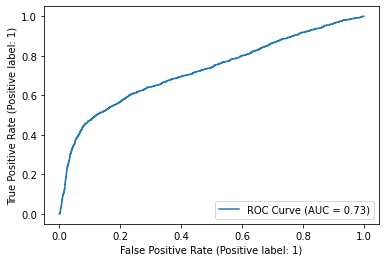

Model run:  b10fc9379f8f4b02acbfe829fddeabfe


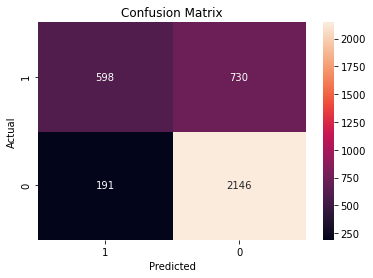

In [33]:
sk_model = LogisticRegression(random_state=None, max_iter=400, solver='newton-cg')

mlflow.set_experiment("scikit_learn_experiment")

with mlflow.start_run():
    train(sk_model, x_train, y_train)
    evaluate(sk_model, x_test, y_test)
    mlflow.sklearn.log_model(sk_model, "log_reg_model")
    print("Model run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()